In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
print("Ready for EDA!")
print(f"Pandas version: {pd.__version__}")

Ready for EDA!
Pandas version: 2.3.3


In [3]:
# Display settings
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 100)      # Show up to 100 rows
pd.set_option('display.float_format', '{:.2f}'.format)  # 2 decimal places

In [4]:
# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')  # Nice plot style
sns.set_palette("husl")                  # Colorful palette

In [5]:
print("Libraries loaded successfully!")
print(f"Pandas version: {pd.__version__}")

Libraries loaded successfully!
Pandas version: 2.3.3


In [6]:
# Specify the file path
data_file = 'air_quality_data.csv'

In [8]:
# How many rows the file has
import os
if os.path.exists(data_file):
    print(f" File found: {data_file}")
    
    # Count rows 
    with open(data_file, 'r') as f:
        row_count = sum(1 for line in f) - 1  # -1 for header
    print(f"Total rows in dataset: {row_count:,}")
else:
    print(f" File not found: {data_file}")
    print(f"Current directory: {os.getcwd()}")
    print("\nMake sure your CSV file is in the project folder!")

 File found: air_quality_data.csv
Total rows in dataset: 5,617,325


In [9]:
# Load a sample 
sample_size = 10000

print(f"Loading first {sample_size:,} rows...")

df = pd.read_csv(data_file, nrows=sample_size)

print(f" Data loaded successfully!")
print(f" Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

Loading first 10,000 rows...
 Data loaded successfully!
 Shape: 10,000 rows × 15 columns


In [10]:
# Display first few rows
print("=" * 80)
print("FIRST 5 ROWS OF DATA")
print("=" * 80)
df.head()

FIRST 5 ROWS OF DATA


,Unnamed: 0,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone
0,0,10140,2022-01-01,21,Good,PM2.5,2,Aberdeen,WA,Washington,46.98,-123.81,16571.00,588.00,America/Los_Angeles
1,1,10140,2022-01-02,12,Good,PM2.5,2,Aberdeen,WA,Washington,46.98,-123.81,16571.00,588.00,America/Los_Angeles
2,2,10140,2022-01-03,18,Good,PM2.5,2,Aberdeen,WA,Washington,46.98,-123.81,16571.00,588.00,America/Los_Angeles
3,3,10140,2022-01-04,19,Good,PM2.5,2,Aberdeen,WA,Washington,46.98,-123.81,16571.00,588.00,America/Los_Angeles
4,4,10140,2022-01-05,17,Good,PM2.5,2,Aberdeen,WA,Washington,46.98,-123.81,16571.00,588.00,America/Los_Angeles


In [11]:
print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)

print(f"\n Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

print("\n Column Names and Data Types:")
print(df.dtypes)

print("\n Memory Usage:")
print(df.memory_usage(deep=True).sum() / 1024**2, "MB")

print("\n Basic Statistics:")
df.info()

DATASET OVERVIEW

 Dataset Shape: 10,000 rows × 15 columns

 Column Names and Data Types:
Unnamed: 0                     int64
CBSA Code                      int64
Date                          object
AQI                            int64
Category                      object
Defining Parameter            object
Number of Sites Reporting      int64
city_ascii                    object
state_id                      object
state_name                    object
lat                          float64
lng                          float64
population                   float64
density                      float64
timezone                      object
dtype: object

 Memory Usage:
4.397849082946777 MB

 Basic Statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 10000 non-null  int64  
 1   CBS

In [12]:
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

# Count missing values per column
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

# Create a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_percent
})

# Only show columns with missing values
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0]
missing_summary = missing_summary.sort_values('Missing_Count', ascending=False)

if len(missing_summary) > 0:
    print("\n Columns with missing values:")
    print(missing_summary)
else:
    print("\n No missing values found!")

# Visualize missing values
plt.figure(figsize=(10, 6))
if len(missing_summary) > 0:
    missing_summary['Percentage'].plot(kind='barh', color='coral')
    plt.xlabel('Percentage of Missing Values')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()

MISSING VALUES ANALYSIS

 No missing values found!


<Figure size 1000x600 with 0 Axes>

In [13]:
print("=" * 80)
print("DATE COLUMN INSPECTION")
print("=" * 80)

# Look at the Date column
print("\nFirst 20 date values:")
print(df['Date'].head(20))

print("\n Unique date values (first 10):")
print(df['Date'].unique()[:10])

print("\n Date column data type:")
print(df['Date'].dtype)

# Check for problematic values
print("\n Checking for '########' or similar issues:")
problematic_dates = df[df['Date'].astype(str).str.contains('#', na=False)]
print(f"Found {len(problematic_dates)} rows with '#' in dates")

if len(problematic_dates) > 0:
    print("\nSample of problematic rows:")
    print(problematic_dates.head())

DATE COLUMN INSPECTION

First 20 date values:
0     2022-01-01
1     2022-01-02
2     2022-01-03
3     2022-01-04
4     2022-01-05
5     2022-01-06
6     2022-01-07
7     2022-01-08
8     2022-01-09
9     2022-01-10
10    2022-01-11
11    2022-01-12
12    2022-01-13
13    2022-01-14
14    2022-01-15
15    2022-01-16
16    2022-01-17
17    2022-01-18
18    2022-01-19
19    2022-01-20
Name: Date, dtype: object

 Unique date values (first 10):
['2022-01-01' '2022-01-02' '2022-01-03' '2022-01-04' '2022-01-05'
 '2022-01-06' '2022-01-07' '2022-01-08' '2022-01-09' '2022-01-10']

 Date column data type:
object

 Checking for '########' or similar issues:
Found 0 rows with '#' in dates


AQI (AIR QUALITY INDEX) ANALYSIS

 AQI Statistics:
count   10000.00
mean       39.45
std        20.35
min         0.00
25%        31.00
50%        39.00
75%        47.00
max       775.00
Name: AQI, dtype: float64

 AQI Value Counts (top 10):
AQI
44    417
40    381
31    361
35    355
36    340
38    339
43    333
41    326
37    323
39    297
Name: count, dtype: int64


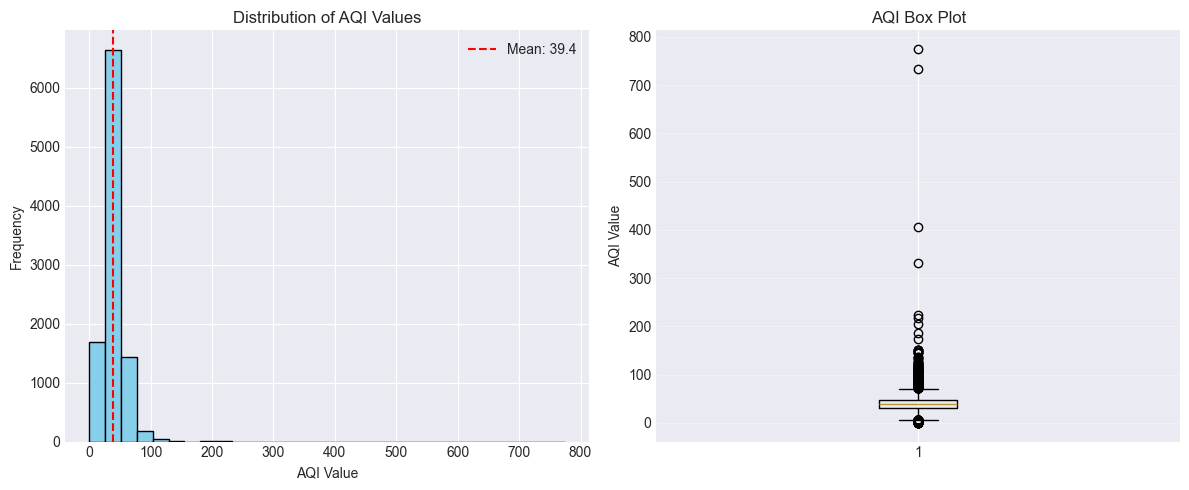


 AQI Range: 0 to 775
 Average AQI: 39.45
 Median AQI: 39.00


In [14]:
print("=" * 80)
print("AQI (AIR QUALITY INDEX) ANALYSIS")
print("=" * 80)

print("\n AQI Statistics:")
print(df['AQI'].describe())

print("\n AQI Value Counts (top 10):")
print(df['AQI'].value_counts().head(10))

# Visualize AQI distribution
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df['AQI'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.title('Distribution of AQI Values')
plt.axvline(df['AQI'].mean(), color='red', linestyle='--', label=f'Mean: {df["AQI"].mean():.1f}')
plt.legend()

# Box plot
plt.subplot(1, 2, 2)
plt.boxplot(df['AQI'], vert=True)
plt.ylabel('AQI Value')
plt.title('AQI Box Plot')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n AQI Range: {df['AQI'].min()} to {df['AQI'].max()}")
print(f" Average AQI: {df['AQI'].mean():.2f}")
print(f" Median AQI: {df['AQI'].median():.2f}")

GEOGRAPHIC DISTRIBUTION

 Number of unique cities: 119
 Number of unique states: 40

 Top 10 cities by number of readings:
city_ascii
Albany         298
Charleston     211
Cleveland      181
Columbus       181
Gainesville    180
Augusta        160
Columbia       151
Des Moines     151
Bangor         150
Decatur        149
Name: count, dtype: int64

 States with most readings:
state_name
Colorado          815
Georgia           777
Ohio              629
California        605
Iowa              537
South Carolina    458
Texas             451
Oregon            450
Illinois          397
New York          362
Name: count, dtype: int64


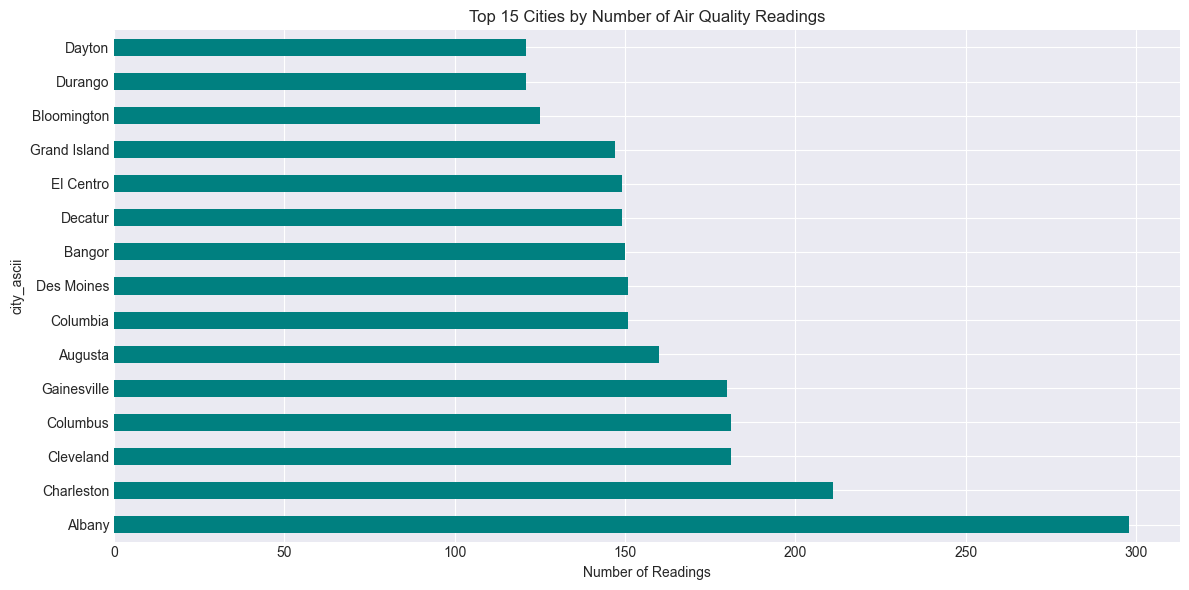

In [15]:
print("=" * 80)
print("GEOGRAPHIC DISTRIBUTION")
print("=" * 80)

print(f"\n Number of unique cities: {df['city_ascii'].nunique()}")
print(f" Number of unique states: {df['state_name'].nunique()}")

print("\n Top 10 cities by number of readings:")
print(df['city_ascii'].value_counts().head(10))

print("\n States with most readings:")
print(df['state_name'].value_counts().head(10))

# Visualize top cities
plt.figure(figsize=(12, 6))
top_cities = df['city_ascii'].value_counts().head(15)
top_cities.plot(kind='barh', color='teal')
plt.xlabel('Number of Readings')
plt.title('Top 15 Cities by Number of Air Quality Readings')
plt.tight_layout()
plt.show()

TEMPORAL ANALYSIS (TIME-BASED)

 Successfully converted 10000 dates
 Failed to convert 0 dates

 Date Range:
  First date: 2022-01-01 00:00:00
  Last date: 2022-05-31 00:00:00
  Time span: 150 days


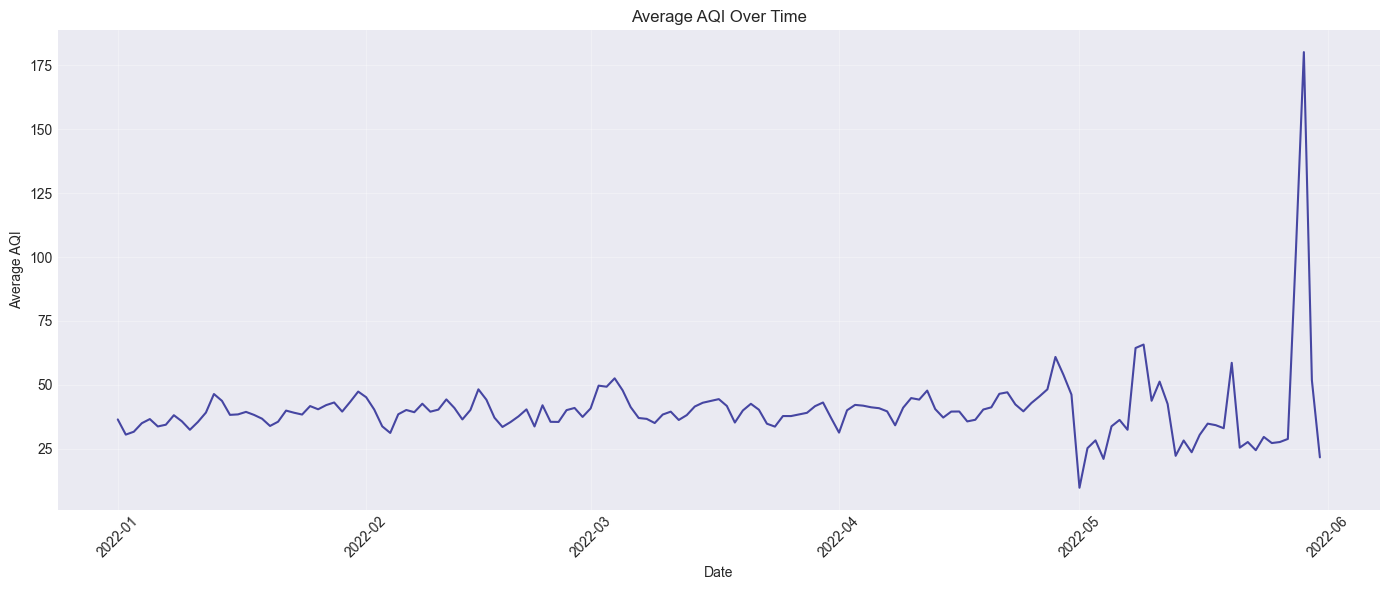

In [16]:
print("=" * 80)
print("TEMPORAL ANALYSIS (TIME-BASED)")
print("=" * 80)

# Convert Date to proper datetime format
try:
    # Remove any rows where Date contains '#'
    df_clean = df[~df['Date'].astype(str).str.contains('#', na=False)].copy()
    
    # Convert to datetime
    df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
    
    print(f"\n Successfully converted {len(df_clean)} dates")
    print(f" Failed to convert {len(df) - len(df_clean)} dates")
    
    print("\n Date Range:")
    print(f"  First date: {df_clean['Date'].min()}")
    print(f"  Last date: {df_clean['Date'].max()}")
    print(f"  Time span: {(df_clean['Date'].max() - df_clean['Date'].min()).days} days")
    
    # Group by date and plot
    daily_avg = df_clean.groupby('Date')['AQI'].mean()
    
    plt.figure(figsize=(14, 6))
    plt.plot(daily_avg.index, daily_avg.values, color='navy', alpha=0.7)
    plt.xlabel('Date')
    plt.ylabel('Average AQI')
    plt.title('Average AQI Over Time')
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f" Error processing dates: {e}")
    print("We'll handle date cleaning in the next phase.")

In [17]:
print("=" * 80)
print("COMPREHENSIVE DATA SUMMARY REPORT")
print("=" * 80)

print(f"""
 DATASET DIMENSIONS
  • Total rows: {df.shape[0]:,}
  • Total columns: {df.shape[1]}
  • Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB

 DATA TYPES
  • Numeric columns: {df.select_dtypes(include=[np.number]).columns.tolist()}
  • Text columns: {df.select_dtypes(include=['object']).columns.tolist()}
  
 GEOGRAPHIC COVERAGE
  • Unique cities: {df['city_ascii'].nunique()}
  • Unique states: {df['state_name'].nunique()}
  • Most monitored city: {df['city_ascii'].value_counts().index[0]}

 AIR QUALITY METRICS
  • Average AQI: {df['AQI'].mean():.2f}
  • AQI range: {df['AQI'].min()} to {df['AQI'].max()}
  • Most common category: {df['Category'].value_counts().index[0]}

 DATA QUALITY
  • Missing values: {df.isnull().sum().sum()} cells
  • Duplicate rows: {df.duplicated().sum()}
""")

print("=" * 80)

COMPREHENSIVE DATA SUMMARY REPORT

 DATASET DIMENSIONS
  • Total rows: 10,000
  • Total columns: 15
  • Memory usage: 4.40 MB

 DATA TYPES
  • Numeric columns: ['Unnamed: 0', 'CBSA Code', 'AQI', 'Number of Sites Reporting', 'lat', 'lng', 'population', 'density']
  • Text columns: ['Date', 'Category', 'Defining Parameter', 'city_ascii', 'state_id', 'state_name', 'timezone']

 GEOGRAPHIC COVERAGE
  • Unique cities: 119
  • Unique states: 40
  • Most monitored city: Albany

 AIR QUALITY METRICS
  • Average AQI: 39.45
  • AQI range: 0 to 775
  • Most common category: Good

 DATA QUALITY
  • Missing values: 0 cells
  • Duplicate rows: 0



In [18]:
# Export summary to a text file
with open('data_inspection_summary.txt', 'w') as f:
    f.write("AIR QUALITY DATA - INITIAL INSPECTION SUMMARY\n")
    f.write("=" * 60 + "\n\n")
    f.write(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns\n")
    f.write(f"Date Range: [To be determined after cleaning]\n")
    f.write(f"Geographic Coverage: {df['city_ascii'].nunique()} cities across {df['state_name'].nunique()} states\n\n")
    f.write(f"AQI Statistics:\n")
    f.write(f"  • Average: {df['AQI'].mean():.2f}\n")
    f.write(f"  • Min: {df['AQI'].min()}\n")
    f.write(f"  • Max: {df['AQI'].max()}\n\n")
    f.write("Next Steps:\n")
    f.write("  1. Clean date column (handle '########' values)\n")
    f.write("  2. Handle any missing values\n")
    f.write("  3. Perform deeper time-series analysis\n")
    f.write("  4. Create geographic visualizations (maps)\n")

print(" Summary exported to data_inspection_summary.txt")

 Summary exported to data_inspection_summary.txt


DEFINING PARAMETER ANALYSIS

 Distribution of Defining Parameters:
Defining Parameter
PM2.5    4740
Ozone    4607
PM10      374
NO2       249
CO         30
Name: count, dtype: int64

 Percentage breakdown:
  • PM2.5: 47.40%
  • Ozone: 46.07%
  • PM10: 3.74%
  • NO2: 2.49%
  • CO: 0.30%


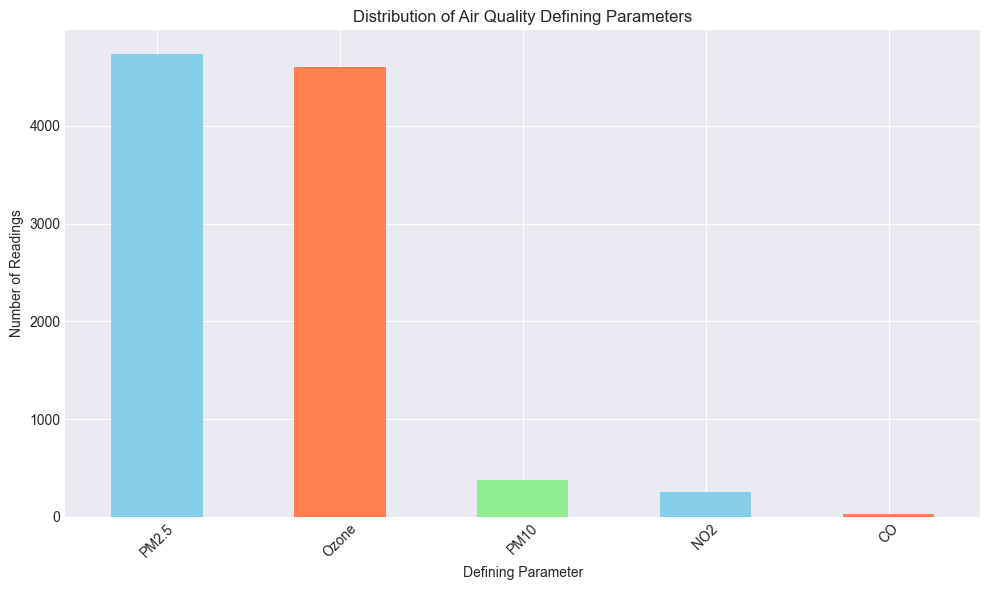


 AQI Statistics by Defining Parameter:
                    count  mean  median  min  max
Defining Parameter                               
CO                     30  2.90    2.00    1   13
NO2                   249 24.95   27.00    0   77
Ozone                4607 40.10   39.00    7  136
PM10                  374 43.11   30.00    1  775
PM2.5                4740 39.52   38.00    0  152


In [19]:
print("=" * 80)
print("DEFINING PARAMETER ANALYSIS")
print("=" * 80)

# Count each parameter type
print("\n Distribution of Defining Parameters:")
param_counts = df['Defining Parameter'].value_counts()
print(param_counts)

print("\n Percentage breakdown:")
param_percent = (param_counts / len(df)) * 100
for param, pct in param_percent.items():
    print(f"  • {param}: {pct:.2f}%")

# Visualize
plt.figure(figsize=(10, 6))
param_counts.plot(kind='bar', color=['skyblue', 'coral', 'lightgreen'])
plt.xlabel('Defining Parameter')
plt.ylabel('Number of Readings')
plt.title('Distribution of Air Quality Defining Parameters')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Compare AQI by parameter
print("\n AQI Statistics by Defining Parameter:")
aqi_by_param = df.groupby('Defining Parameter')['AQI'].agg(['count', 'mean', 'median', 'min', 'max'])
print(aqi_by_param)

In [20]:
print("=" * 80)
print("DATE ISSUE INVESTIGATION")
print("=" * 80)

# Check for rows with problematic dates
print("\n Searching for '########' in dates...")
problematic_mask = df['Date'].astype(str).str.contains('#', na=False)
problematic_rows = df[problematic_mask]

print(f"\n Found {len(problematic_rows)} rows with '########' in Date column")

if len(problematic_rows) > 0:
    print("\n Sample of problematic rows:")
    print(problematic_rows[['Unnamed: 0', 'CBSA Code', 'Date', 'AQI', 'city_ascii', 'state_id']].head(20))
    
    # Check if there's a pattern
    print("\n Cities affected:")
    print(problematic_rows['city_ascii'].value_counts().head(10))
    
    print("\n CBSA Codes affected:")
    print(problematic_rows['CBSA Code'].value_counts().head(10))
    
    # Check row numbers
    print(f"\n Row number range: {problematic_rows['Unnamed: 0'].min()} to {problematic_rows['Unnamed: 0'].max()}")

# Check all unique values in Date column
print("\n Total unique date values:")
print(f"  • Unique dates: {df['Date'].nunique()}")
print(f"  • Should be approximately: 150 days (Jan 1 - May 31)")

DATE ISSUE INVESTIGATION

 Searching for '########' in dates...

 Found 0 rows with '########' in Date column

 Total unique date values:
  • Unique dates: 151
  • Should be approximately: 150 days (Jan 1 - May 31)


OUTLIER ANALYSIS - EXTREME AQI VALUES

 Top 10 Highest AQI Readings:
            Date  AQI        Category Defining Parameter   city_ascii  \
6614  2022-02-23  775       Hazardous               PM10       Deming   
7509  2022-05-29  733       Hazardous               PM10    El Centro   
7508  2022-05-28  406       Hazardous               PM10    El Centro   
443   2022-01-25  331       Hazardous               PM10  Albuquerque   
7463  2022-04-11  223  Very Unhealthy               PM10    El Centro   
7500  2022-05-20  217  Very Unhealthy               PM10    El Centro   
7488  2022-05-08  205  Very Unhealthy               PM10    El Centro   
7478  2022-04-28  187       Unhealthy               PM10    El Centro   
481   2022-03-04  173       Unhealthy               PM10  Albuquerque   
1345  2022-01-21  152       Unhealthy              PM2.5  Bakersfield   

      state_name  
6614  New Mexico  
7509  California  
7508  California  
443   New Mexico  
7463  California  
7500  Califor

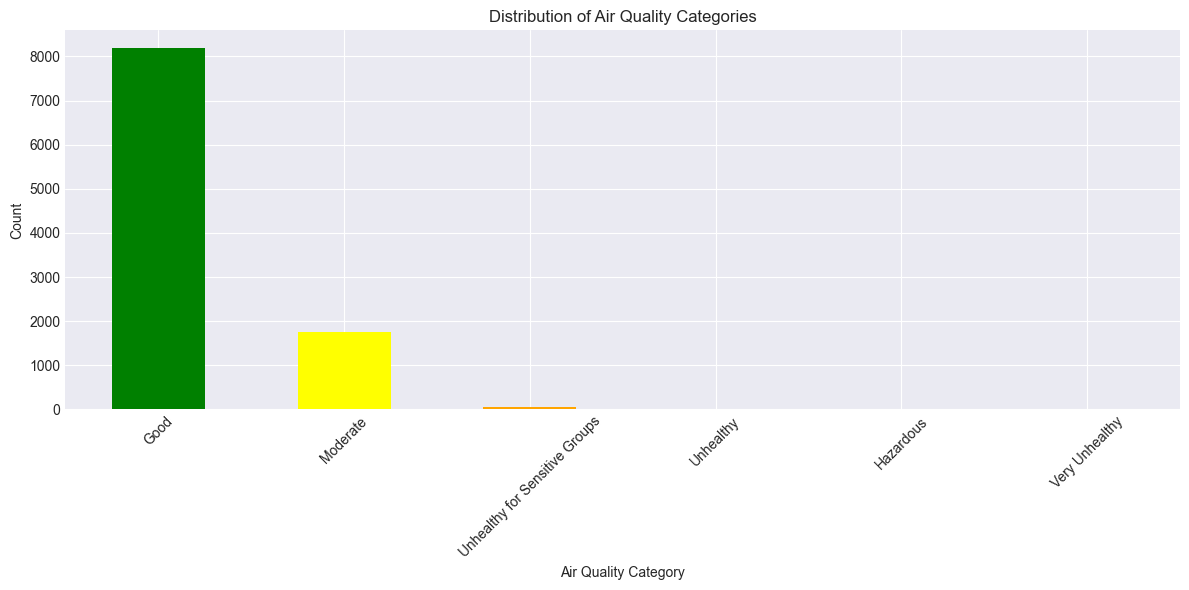

In [21]:
print("=" * 80)
print("OUTLIER ANALYSIS - EXTREME AQI VALUES")
print("=" * 80)

# Find the highest AQI readings
print("\n Top 10 Highest AQI Readings:")
top_aqi = df.nlargest(10, 'AQI')[['Date', 'AQI', 'Category', 'Defining Parameter', 'city_ascii', 'state_name']]
print(top_aqi)

# Find readings above 100 (Unhealthy)
unhealthy = df[df['AQI'] > 100]
print(f"\n Readings with AQI > 100 (Unhealthy): {len(unhealthy)}")

if len(unhealthy) > 0:
    print("\n Unhealthy readings by category:")
    print(unhealthy['Category'].value_counts())
    
    print("\n Cities with unhealthy air:")
    print(unhealthy['city_ascii'].value_counts())
    
    print("\n Pollutant causing unhealthy air:")
    print(unhealthy['Defining Parameter'].value_counts())

# Visualize AQI categories
print("\n AQI Category Breakdown:")
category_order = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
categories_in_data = df['Category'].unique()

plt.figure(figsize=(12, 6))
category_counts = df['Category'].value_counts()
category_counts.plot(kind='bar', color=['green', 'yellow', 'orange', 'red', 'purple', 'maroon'])
plt.xlabel('Air Quality Category')
plt.ylabel('Count')
plt.title('Distribution of Air Quality Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
print("=" * 80)
print("COMPREHENSIVE DATASET ANALYSIS")
print("=" * 80)

# ============================================================================
# 1. AQI ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("1. AQI (AIR QUALITY INDEX) ANALYSIS")
print("="*80)

print("\n AQI Statistics:")
print(f"  • Mean (Average): {df['AQI'].mean():.2f}")
print(f"  • Median (Middle value): {df['AQI'].median():.2f}")
print(f"  • Mode (Most common): {df['AQI'].mode()[0]}")
print(f"  • Minimum: {df['AQI'].min()}")
print(f"  • Maximum: {df['AQI'].max()}")
print(f"  • Standard Deviation: {df['AQI'].std():.2f}")

# Find states with highest and lowest average AQI
aqi_by_state = df.groupby('state_name')['AQI'].agg(['mean', 'min', 'max', 'count'])
aqi_by_state = aqi_by_state.sort_values('mean', ascending=False)

print("\n Top 5 States with HIGHEST Average AQI:")
print(aqi_by_state.head())

print("\n Top 5 States with LOWEST Average AQI:")
print(aqi_by_state.tail())



COMPREHENSIVE DATASET ANALYSIS

1. AQI (AIR QUALITY INDEX) ANALYSIS

 AQI Statistics:
  • Mean (Average): 39.45
  • Median (Middle value): 39.00
  • Mode (Most common): 44
  • Minimum: 0
  • Maximum: 775
  • Standard Deviation: 20.35

 Top 5 States with HIGHEST Average AQI:
               mean  min  max  count
state_name                          
California    52.54    1  733    605
Louisiana     50.15    2  115    121
Massachusetts 46.30    5   69     60
Colorado      45.37    1  108    815
Georgia       44.58    8  151    777

 Top 5 States with LOWEST Average AQI:
             mean  min  max  count
state_name                        
Indiana     31.56    7   93     89
Virginia    23.93    0   59    234
Montana     23.83    2   94    184
Nebraska    19.71    0   76    266
Puerto Rico 12.08    4   42     13


In [24]:
# ===========================================================================
# 2. CATEGORY ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("2. CATEGORY ANALYSIS")
print("="*80)

print("\n All Categories Available:")
categories = df['Category'].unique()
for i, cat in enumerate(categories, 1):
    print(f"  {i}. {cat}")

print("\n Category Frequency Count:")
category_counts = df['Category'].value_counts()
print(category_counts)

print(f"\n MOST COMMON Category: '{category_counts.index[0]}'")
print(f"   • Appears {category_counts.iloc[0]:,} times ({category_counts.iloc[0]/len(df)*100:.2f}%)")

# Find which state has most of this category
most_common_cat = category_counts.index[0]
state_with_most = df[df['Category'] == most_common_cat]['state_name'].value_counts()
print(f"   • State with most '{most_common_cat}' readings: {state_with_most.index[0]} ({state_with_most.iloc[0]} times)")

print(f"\n LEAST COMMON Category: '{category_counts.index[-1]}'")
print(f"   • Appears {category_counts.iloc[-1]:,} times ({category_counts.iloc[-1]/len(df)*100:.2f}%)")

# Find which state has most of this category
least_common_cat = category_counts.index[-1]
state_with_least = df[df['Category'] == least_common_cat]['state_name'].value_counts()
print(f"   • State with most '{least_common_cat}' readings: {state_with_least.index[0]} ({state_with_least.iloc[0]} times)")


2. CATEGORY ANALYSIS

 All Categories Available:
  1. Good
  2. Moderate
  3. Unhealthy for Sensitive Groups
  4. Unhealthy
  5. Hazardous
  6. Very Unhealthy

 Category Frequency Count:
Category
Good                              8179
Moderate                          1757
Unhealthy for Sensitive Groups      51
Unhealthy                            6
Hazardous                            4
Very Unhealthy                       3
Name: count, dtype: int64

 MOST COMMON Category: 'Good'
   • Appears 8,179 times (81.79%)
   • State with most 'Good' readings: Colorado (627 times)

 LEAST COMMON Category: 'Very Unhealthy'
   • Appears 3 times (0.03%)
   • State with most 'Very Unhealthy' readings: California (3 times)


In [25]:
# ============================================================================
# 3. DEFINING PARAMETER ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("3. DEFINING PARAMETER ANALYSIS")
print("="*80)

print("\n All Defining Parameters Available:")
parameters = df['Defining Parameter'].unique()
for i, param in enumerate(parameters, 1):
    print(f"  {i}. {param}")

print("\n Parameter Frequency Count:")
param_counts = df['Defining Parameter'].value_counts()
print(param_counts)

print(f"\n MOST COMMON Parameter: '{param_counts.index[0]}'")
print(f"   • Appears {param_counts.iloc[0]:,} times ({param_counts.iloc[0]/len(df)*100:.2f}%)")

# Find which state has most of this parameter
most_common_param = param_counts.index[0]
state_with_most_param = df[df['Defining Parameter'] == most_common_param]['state_name'].value_counts()
print(f"   • State with most '{most_common_param}' readings: {state_with_most_param.index[0]} ({state_with_most_param.iloc[0]} times)")

print(f"\n LEAST COMMON Parameter: '{param_counts.index[-1]}'")
print(f"   • Appears {param_counts.iloc[-1]:,} times ({param_counts.iloc[-1]/len(df)*100:.2f}%)")

# Find which state has most of this parameter
least_common_param = param_counts.index[-1]
state_with_least_param = df[df['Defining Parameter'] == least_common_param]['state_name'].value_counts()
print(f"   • State with most '{least_common_param}' readings: {state_with_least_param.index[0]} ({state_with_least_param.iloc[0]} times)")



3. DEFINING PARAMETER ANALYSIS

 All Defining Parameters Available:
  1. PM2.5
  2. Ozone
  3. NO2
  4. PM10
  5. CO

 Parameter Frequency Count:
Defining Parameter
PM2.5    4740
Ozone    4607
PM10      374
NO2       249
CO         30
Name: count, dtype: int64

 MOST COMMON Parameter: 'PM2.5'
   • Appears 4,740 times (47.40%)
   • State with most 'PM2.5' readings: Georgia (539 times)

 LEAST COMMON Parameter: 'CO'
   • Appears 30 times (0.30%)
   • State with most 'CO' readings: Colorado (5 times)


In [26]:
# ============================================================================
# 4. NUMBER OF SITES REPORTING
# ============================================================================
print("\n" + "="*80)
print("4. NUMBER OF SITES REPORTING ANALYSIS")
print("="*80)

print("\n All Unique Site Numbers:")
sites = sorted(df['Number of Sites Reporting'].unique())
print(f"  Site counts available: {sites}")

print("\n Site Frequency Count:")
site_counts = df['Number of Sites Reporting'].value_counts().sort_index()
print(site_counts)

print(f"\n MOST COMMON Site Count: {site_counts.index[-1]} sites")
print(f"   • Appears {site_counts.iloc[-1]:,} times ({site_counts.iloc[-1]/len(df)*100:.2f}%)")

most_common_sites = site_counts.index[-1]
state_with_most_sites = df[df['Number of Sites Reporting'] == most_common_sites]['state_name'].value_counts()
print(f"   • State with most readings having {most_common_sites} sites: {state_with_most_sites.index[0]} ({state_with_most_sites.iloc[0]} times)")

print(f"\n LEAST COMMON Site Count: {site_counts.index[0]} site(s)")
print(f"   • Appears {site_counts.iloc[0]:,} times ({site_counts.iloc[0]/len(df)*100:.2f}%)")

least_common_sites = site_counts.index[0]
state_with_least_sites = df[df['Number of Sites Reporting'] == least_common_sites]['state_name'].value_counts()
print(f"   • State with most readings having {least_common_sites} site(s): {state_with_least_sites.index[0]} ({state_with_least_sites.iloc[0]} times)")



4. NUMBER OF SITES REPORTING ANALYSIS

 All Unique Site Numbers:
  Site counts available: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(28), np.int64(30), np.int64(31), np.int64(32)]

 Site Frequency Count:
Number of Sites Reporting
1     5231
2     1897
3      969
4      441
5      433
6      211
7      145
8       39
9      172
10      70
11      94
12      22
13      32
14      32
15      82
16      33
17       9
18       6
19       3
20      12
21      21
22      18
23       8
24       4
25       6
28       1
30       3
31       3
32       3
Name: count, dtype: int64

 MOST COMMON Site Count: 32 sites
   • Appears 3 times (0.03%)
   • State with most readings having 32 sites: Illin

In [28]:
# ============================================================================
# 5. CITY ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("5. CITY ANALYSIS")
print("="*80)

print(f"\n Total Unique Cities: {df['city_ascii'].nunique()}")
print("\n All Cities (first 30):")
all_cities = sorted(df['city_ascii'].unique())
for i, city in enumerate(all_cities[:30], 1):
    print(f"  {i}. {city}")
if len(all_cities) > 30:
    print(f"  ... and {len(all_cities) - 30} more cities")

city_counts = df['city_ascii'].value_counts()

print(f"\n MOST FREQUENT City: '{city_counts.index[0]}'")
print(f"   • Appears {city_counts.iloc[0]:,} times ({city_counts.iloc[0]/len(df)*100:.2f}%)")
most_freq_city_state = df[df['city_ascii'] == city_counts.index[0]]['state_name'].iloc[0]
print(f"   • State: {most_freq_city_state}")

print(f"\n LEAST FREQUENT City: '{city_counts.index[-1]}'")
print(f"   • Appears {city_counts.iloc[-1]:,} time(s) ({city_counts.iloc[-1]/len(df)*100:.2f}%)")
least_freq_city_state = df[df['city_ascii'] == city_counts.index[-1]]['state_name'].iloc[0]
print(f"   • State: {least_freq_city_state}")



5. CITY ANALYSIS

 Total Unique Cities: 119

 All Cities (first 30):
  1. Aberdeen
  2. Akron
  3. Albany
  4. Albuquerque
  5. Amarillo
  6. Americus
  7. Ann Arbor
  8. Appleton
  9. Ardmore
  10. Arkadelphia
  11. Ashtabula
  12. Athens
  13. Atlanta
  14. Augusta
  15. Austin
  16. Bakersfield
  17. Baltimore
  18. Bangor
  19. Baraboo
  20. Baton Rouge
  21. Beatrice
  22. Beaumont
  23. Beaver Dam
  24. Bellingham
  25. Bend
  26. Billings
  27. Bishop
  28. Bismarck
  29. Blacksburg
  30. Bloomington
  ... and 89 more cities

 MOST FREQUENT City: 'Albany'
   • Appears 298 times (2.98%)
   • State: Georgia

 LEAST FREQUENT City: 'Bellingham'
   • Appears 1 time(s) (0.01%)
   • State: Washington


In [29]:
# ============================================================================
# 6. STATE_ID ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("6. STATE ID ANALYSIS")
print("="*80)

print(f"\n Total Unique State IDs: {df['state_id'].nunique()}")
print("\n All State IDs:")
all_state_ids = sorted(df['state_id'].unique())
print(", ".join(all_state_ids))

state_id_counts = df['state_id'].value_counts()

print(f"\n MOST FREQUENT State ID: '{state_id_counts.index[0]}'")
print(f"   • Appears {state_id_counts.iloc[0]:,} times ({state_id_counts.iloc[0]/len(df)*100:.2f}%)")
most_freq_state_name = df[df['state_id'] == state_id_counts.index[0]]['state_name'].iloc[0]
print(f"   • State Name: {most_freq_state_name}")

print(f"\n LEAST FREQUENT State ID: '{state_id_counts.index[-1]}'")
print(f"   • Appears {state_id_counts.iloc[-1]:,} time(s) ({state_id_counts.iloc[-1]/len(df)*100:.2f}%)")
least_freq_state_name = df[df['state_id'] == state_id_counts.index[-1]]['state_name'].iloc[0]
print(f"   • State Name: {least_freq_state_name}")




6. STATE ID ANALYSIS

 Total Unique State IDs: 40

 All State IDs:
AL, AR, AZ, CA, CO, FL, GA, IA, IL, IN, KY, LA, MA, MD, ME, MI, MN, MO, MS, MT, NC, ND, NE, NH, NM, NY, OH, OK, OR, PA, PR, SC, TN, TX, UT, VA, WA, WI, WV, WY

 MOST FREQUENT State ID: 'CO'
   • Appears 815 times (8.15%)
   • State Name: Colorado

 LEAST FREQUENT State ID: 'PR'
   • Appears 13 time(s) (0.13%)
   • State Name: Puerto Rico


In [30]:
# ============================================================================
# 7. STATE NAME ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("7. STATE NAME ANALYSIS")
print("="*80)

print(f"\n Total Unique States: {df['state_name'].nunique()}")
print("\n All State Names:")
all_states = sorted(df['state_name'].unique())
for i, state in enumerate(all_states, 1):
    print(f"  {i}. {state}")

state_counts = df['state_name'].value_counts()

print(f"\n MOST FREQUENT State: '{state_counts.index[0]}'")
print(f"   • Appears {state_counts.iloc[0]:,} times ({state_counts.iloc[0]/len(df)*100:.2f}%)")

print(f"\n LEAST FREQUENT State: '{state_counts.index[-1]}'")
print(f"   • Appears {state_counts.iloc[-1]:,} time(s) ({state_counts.iloc[-1]/len(df)*100:.2f}%)")




7. STATE NAME ANALYSIS

 Total Unique States: 40

 All State Names:
  1. Alabama
  2. Arizona
  3. Arkansas
  4. California
  5. Colorado
  6. Florida
  7. Georgia
  8. Illinois
  9. Indiana
  10. Iowa
  11. Kentucky
  12. Louisiana
  13. Maine
  14. Maryland
  15. Massachusetts
  16. Michigan
  17. Minnesota
  18. Mississippi
  19. Missouri
  20. Montana
  21. Nebraska
  22. New Hampshire
  23. New Mexico
  24. New York
  25. North Carolina
  26. North Dakota
  27. Ohio
  28. Oklahoma
  29. Oregon
  30. Pennsylvania
  31. Puerto Rico
  32. South Carolina
  33. Tennessee
  34. Texas
  35. Utah
  36. Virginia
  37. Washington
  38. West Virginia
  39. Wisconsin
  40. Wyoming

 MOST FREQUENT State: 'Colorado'
   • Appears 815 times (8.15%)

 LEAST FREQUENT State: 'Puerto Rico'
   • Appears 13 time(s) (0.13%)


In [31]:
# ============================================================================
# 8. LATITUDE ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("8. LATITUDE ANALYSIS")
print("="*80)

print("\n Latitude Statistics:")
print(f"  • Mean (Average): {df['lat'].mean():.4f}")
print(f"  • Median (Middle value): {df['lat'].median():.4f}")
print(f"  • Mode (Most common): {df['lat'].mode()[0]:.4f}")
print(f"  • Minimum (Southernmost): {df['lat'].min():.4f}")
print(f"  • Maximum (Northernmost): {df['lat'].max():.4f}")

# Find cities at extreme latitudes
southernmost = df[df['lat'] == df['lat'].min()]
northernmost = df[df['lat'] == df['lat'].max()]

print(f"\n Southernmost Location:")
print(f"   • City: {southernmost['city_ascii'].iloc[0]}, {southernmost['state_name'].iloc[0]}")
print(f"   • Latitude: {southernmost['lat'].iloc[0]:.4f}")

print(f"\n Northernmost Location:")
print(f"   • City: {northernmost['city_ascii'].iloc[0]}, {northernmost['state_name'].iloc[0]}")
print(f"   • Latitude: {northernmost['lat'].iloc[0]:.4f}")




8. LATITUDE ANALYSIS

 Latitude Statistics:
  • Mean (Average): 38.1590
  • Median (Middle value): 38.8674
  • Mode (Most common): 41.5725
  • Minimum (Southernmost): 17.9743
  • Maximum (Northernmost): 48.7548

 Southernmost Location:
   • City: Guayama, Puerto Rico
   • Latitude: 17.9743

 Northernmost Location:
   • City: Bellingham, Washington
   • Latitude: 48.7548


In [39]:
# ============================================================================
# 9. LONGITUDE ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("9. LONGITUDE ANALYSIS")
print("="*80)

print("\n Longitude Statistics:")
print(f"  • Mean (Average): {df['lng'].mean():.4f}")
print(f"  • Median (Middle value): {df['lng'].median():.4f}")
print(f"  • Mode (Most common): {df['lng'].mode()[0]:.4f}")
print(f"  • Minimum (Westernmost): {df['lng'].min():.4f}")
print(f"  • Maximum (Easternmost): {df['lng'].max():.4f}")

# Find cities at extreme longitudes
westernmost = df[df['lng'] == df['lng'].min()]
easternmost = df[df['lng'] == df['lng'].max()]

print(f"\n Westernmost Location:")
print(f"   • City: {westernmost['city_ascii'].iloc[0]}, {westernmost['state_name'].iloc[0]}")
print(f"   • Longitude: {westernmost['lng'].iloc[0]:.4f}")

print(f"\n Easternmost Location:")
print(f"   • City: {easternmost['city_ascii'].iloc[0]}, {easternmost['state_name'].iloc[0]}")
print(f"   • Longitude: {easternmost['lng'].iloc[0]:.4f}")




9. LONGITUDE ANALYSIS

 Longitude Statistics:
  • Mean (Average): -93.7345
  • Median (Middle value): -90.2412
  • Mode (Most common): -93.6105
  • Minimum (Westernmost): -123.8094
  • Maximum (Easternmost): -66.1104

 Westernmost Location:
   • City: Aberdeen, Washington
   • Longitude: -123.8094

 Easternmost Location:
   • City: Guayama, Puerto Rico
   • Longitude: -66.1104


In [33]:
# ============================================================================
# 10. POPULATION ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("10. POPULATION ANALYSIS")
print("="*80)

print("\n Population Statistics:")
print(f"  • Mean (Average): {df['population'].mean():,.0f}")
print(f"  • Median (Middle value): {df['population'].median():,.0f}")
print(f"  • Mode (Most common): {df['population'].mode()[0]:,.0f}")
print(f"  • Minimum: {df['population'].min():,.0f}")
print(f"  • Maximum: {df['population'].max():,.0f}")

# Find cities with extreme populations
smallest_pop = df[df['population'] == df['population'].min()]
largest_pop = df[df['population'] == df['population'].max()]

print(f"\n Smallest Population:")
print(f"   • City: {smallest_pop['city_ascii'].iloc[0]}, {smallest_pop['state_name'].iloc[0]}")
print(f"   • Population: {smallest_pop['population'].iloc[0]:,.0f}")

print(f"\n Largest Population:")
print(f"   • City: {largest_pop['city_ascii'].iloc[0]}, {largest_pop['state_name'].iloc[0]}")
print(f"   • Population: {largest_pop['population'].iloc[0]:,.0f}")




10. POPULATION ANALYSIS

 Population Statistics:
  • Mean (Average): 506,822
  • Median (Middle value): 132,710
  • Mode (Most common): 519,180
  • Minimum: 3,747
  • Maximum: 8,586,888

 Smallest Population:
   • City: Bishop, California
   • Population: 3,747

 Largest Population:
   • City: Chicago, Illinois
   • Population: 8,586,888


In [36]:
# ============================================================================
# 11. DENSITY ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("11. DENSITY ANALYSIS")
print("="*80)

print("\n Population Density Statistics (people per sq km):")
print(f"  • Mean (Average): {df['density'].mean():,.2f}")
print(f"  • Median (Middle value): {df['density'].median():,.2f}")
print(f"  • Mode (Most common): {df['density'].mode()[0]:,.2f}")
print(f"  • Minimum: {df['density'].min():,.2f}")
print(f"  • Maximum: {df['density'].max():,.2f}")

# Find cities with extreme density
lowest_density = df[df['density'] == df['density'].min()]
highest_density = df[df['density'] == df['density'].max()]

print(f"\n Lowest Density:")
print(f"   • City: {lowest_density['city_ascii'].iloc[0]}, {lowest_density['state_name'].iloc[0]}")
print(f"   • Density: {lowest_density['density'].iloc[0]:,.2f} people/sq km")

print(f"\n Highest Density:")
print(f"   • City: {highest_density['city_ascii'].iloc[0]}, {highest_density['state_name'].iloc[0]}")
print(f"   • Density: {highest_density['density'].iloc[0]:,.2f} people/sq km")




11. DENSITY ANALYSIS

 Population Density Statistics (people per sq km):
  • Mean (Average): 955.82
  • Median (Middle value): 807.00
  • Mode (Most common): 509.00
  • Minimum: 18.00
  • Maximum: 5,505.00

 Lowest Density:
   • City: Butte, Montana
   • Density: 18.00 people/sq km

 Highest Density:
   • City: Boston, Massachusetts
   • Density: 5,505.00 people/sq km


In [37]:
# ============================================================================
# 12. TIMEZONE ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("12. TIMEZONE ANALYSIS")
print("="*80)

print(f"\n Total Unique Timezones: {df['timezone'].nunique()}")
print("\n All Timezones Available:")
timezone_counts = df['timezone'].value_counts()
for i, (tz, count) in enumerate(timezone_counts.items(), 1):
    print(f"  {i}. {tz}: {count} readings ({count/len(df)*100:.2f}%)")

print("\n" + "="*80)


12. TIMEZONE ANALYSIS

 Total Unique Timezones: 9

 All Timezones Available:
  1. America/New_York: 3632 readings (36.32%)
  2. America/Chicago: 3073 readings (30.73%)
  3. America/Denver: 1720 readings (17.20%)
  4. America/Los_Angeles: 1180 readings (11.80%)
  5. America/Matamoros: 116 readings (1.16%)
  6. America/Detroit: 115 readings (1.15%)
  7. America/Phoenix: 90 readings (0.90%)
  8. America/Indiana/Indianapolis: 61 readings (0.61%)
  9. America/Puerto_Rico: 13 readings (0.13%)

